In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_csv(r"C:\Users\paras\Downloads\handmade_products.csv")

In [37]:
data.head(10)

,Product_Category,Development_Cost,Sold_Price,Quantity_Sold,Region,Seasonality_Factor,Profit_Margin
0,Woodcraft,557.95,1771.48,71,West,High,68.50
1,Leather Goods,1398.20,1272.20,195,West,Medium,-9.90
2,Ceramics,1258.99,2920.79,61,North,High,56.90
3,Leather Goods,1683.07,2576.96,21,North,Low,34.69
4,Leather Goods,429.39,2220.84,48,South,Low,80.67
5,Textiles,843.02,860.76,139,North,High,2.06
6,Ceramics,446.25,916.99,140,East,High,51.34
7,Ceramics,1535.19,313.21,122,West,Low,-390.15
8,Ceramics,907.80,2189.86,110,North,Low,58.55
9,Leather Goods,495.09,510.49,122,North,Medium,3.02


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Category    50 non-null     object 
 1   Development_Cost    50 non-null     float64
 2   Sold_Price          50 non-null     float64
 3   Quantity_Sold       50 non-null     int64  
 4   Region              50 non-null     object 
 5   Seasonality_Factor  50 non-null     object 
 6   Profit_Margin       50 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ KB


In [33]:
data.describe()

,Development_Cost,Sold_Price,Quantity_Sold,Profit_Margin
count,50.000000,50.000000,50.000000,50.000000
mean,1078.747400,1473.507600,121.840000,-8.253600
std,515.269657,739.572533,52.010344,128.770703
min,126.750000,201.460000,11.000000,-694.860000
25%,658.952500,866.457500,81.750000,-9.532500
50%,1152.025000,1398.185000,132.500000,29.870000
75%,1474.252500,1997.195000,156.000000,54.865000
max,1933.990000,2920.790000,196.000000,95.370000


In [35]:
data.isnull().sum()

Product_Category      0
Development_Cost      0
Sold_Price            0
Quantity_Sold         0
Region                0
Seasonality_Factor    0
Profit_Margin         0
dtype: int64

C:\Users\paras\AppData\Local\Temp\ipykernel_340\2844580256.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Product_Category", y="Quantity_Sold", data=data, estimator=sum, ci=None)


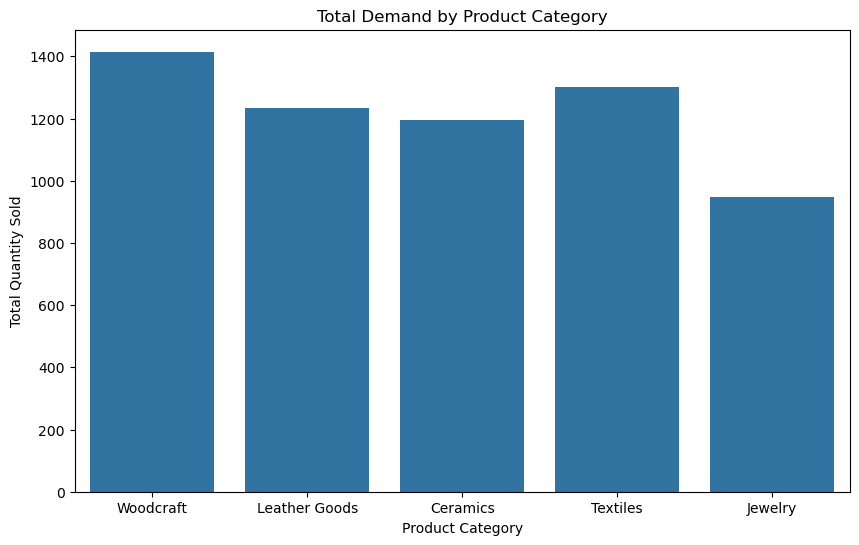

In [41]:

plt.figure(figsize=(10, 6))
sns.barplot(x="Product_Category", y="Quantity_Sold", data=data, estimator=sum, ci=None)
plt.title("Total Demand by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.show()

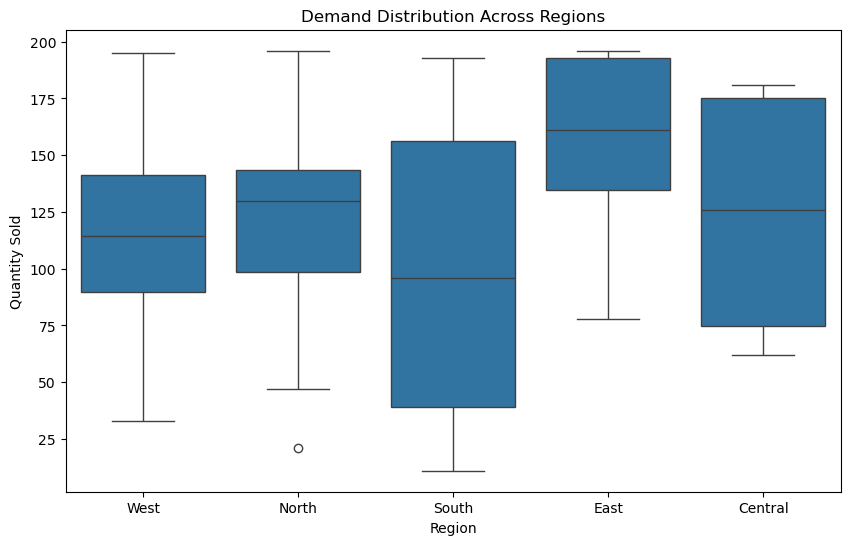

In [45]:
# 2. Demand Across Regions
plt.figure(figsize=(10, 6))
sns.boxplot(x="Region", y="Quantity_Sold", data=data)
plt.title("Demand Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Quantity Sold")
plt.show()

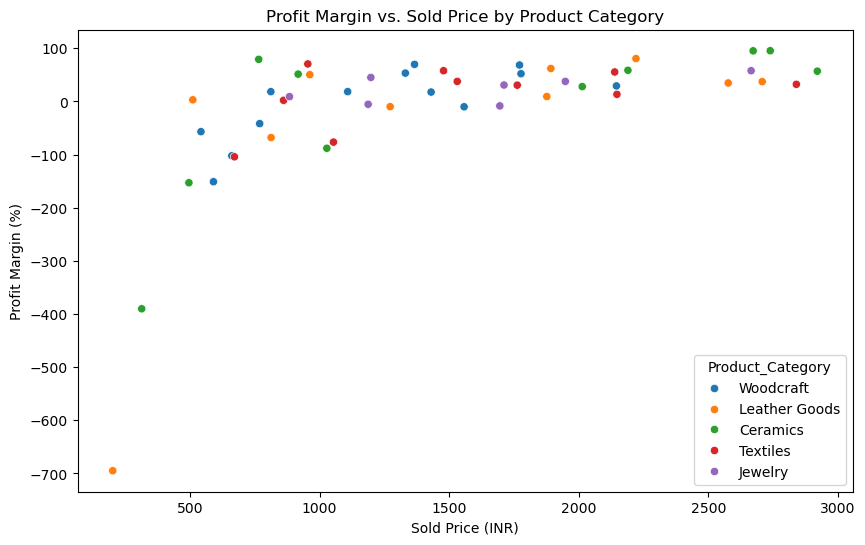

In [47]:
# 3. Profit Margin vs. Sold Price by Product Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sold_Price", y="Profit_Margin", hue="Product_Category", data=data)
plt.title("Profit Margin vs. Sold Price by Product Category")
plt.xlabel("Sold Price (INR)")
plt.ylabel("Profit Margin (%)")
plt.show()

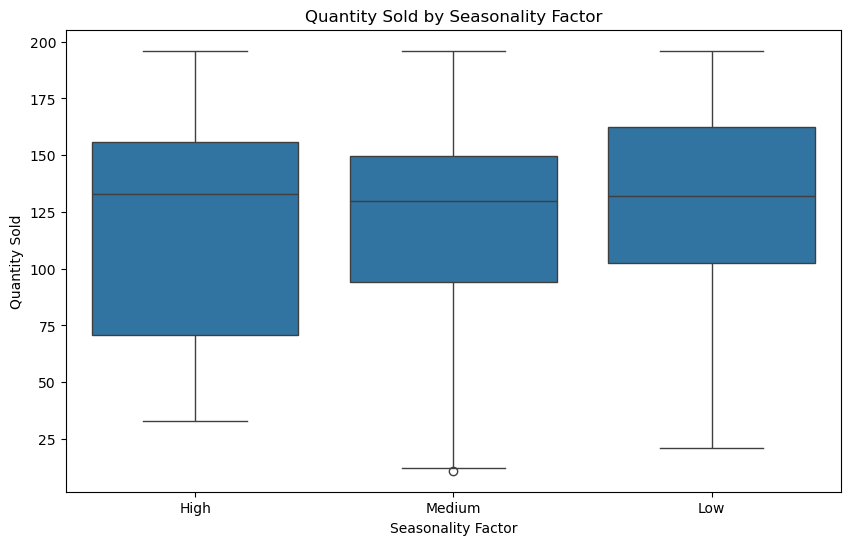

In [51]:
# 4. Quantity Sold by Seasonality Factor
plt.figure(figsize=(10, 6))
sns.boxplot(x="Seasonality_Factor", y="Quantity_Sold", data=data)
plt.title("Quantity Sold by Seasonality Factor")
plt.xlabel("Seasonality Factor")
plt.ylabel("Quantity Sold")
plt.show()

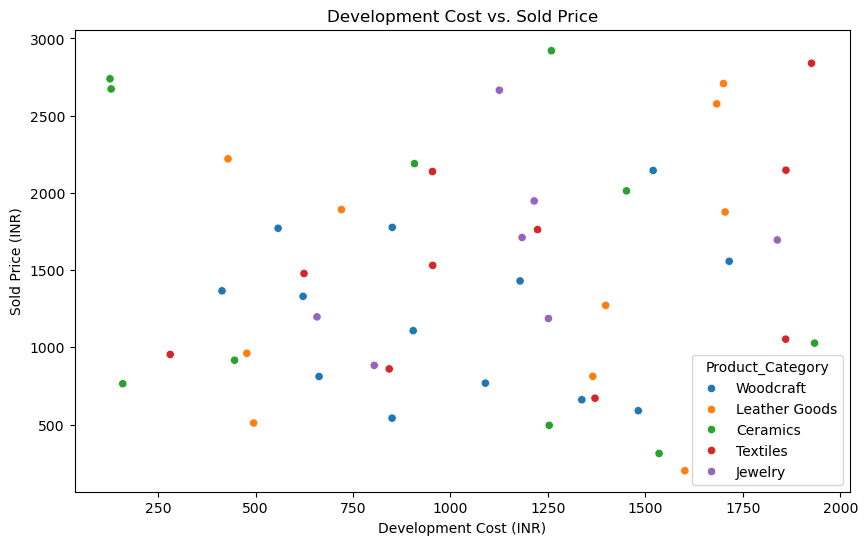

In [53]:
# 5. Development Cost vs. Sold Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Development_Cost", y="Sold_Price", hue="Product_Category", data=data)
plt.title("Development Cost vs. Sold Price")
plt.xlabel("Development Cost (INR)")
plt.ylabel("Sold Price (INR)")
plt.show()

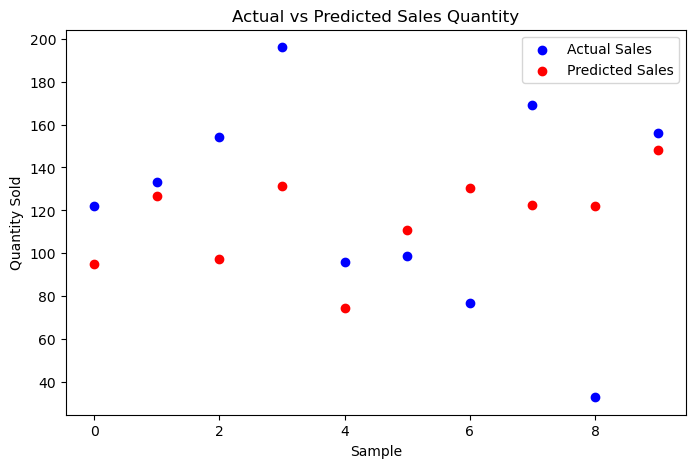

In [69]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and preprocess data

label_encoder = LabelEncoder()
data['Product_Category'] = label_encoder.fit_transform(data['Product_Category'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Seasonality_Factor'] = label_encoder.fit_transform(data['Seasonality_Factor'])

# Define features and target, and split data
X = data[['Product_Category', 'Development_Cost', 'Sold_Price', 'Profit_Margin', 'Region', 'Seasonality_Factor']]
y = data['Quantity_Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model and predict
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Simple plot of Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Sales")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Quantity Sold")
plt.legend()
plt.title("Actual vs Predicted Sales Quantity")
plt.show()


Mean Absolute Error (MAE): 38.498000000000005
Mean Squared Error (MSE): 2178.3802000000005
Root Mean Squared Error (RMSE): 46.67312074417138


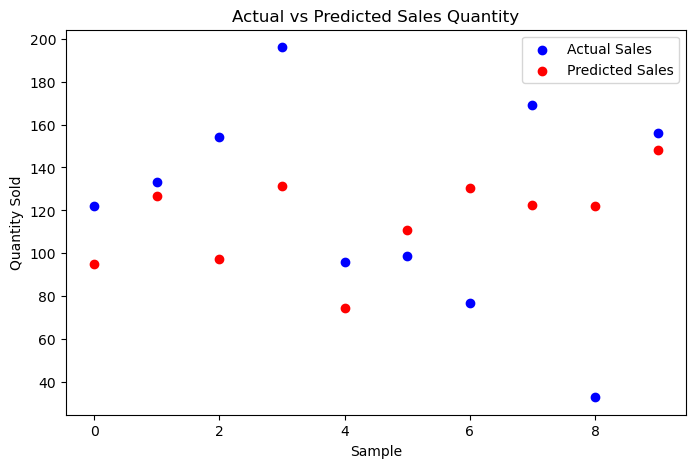

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Data Preprocessing
# Encoding categorical features
label_encoder = LabelEncoder()
data['Product_Category'] = label_encoder.fit_transform(data['Product_Category'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Seasonality_Factor'] = label_encoder.fit_transform(data['Seasonality_Factor'])

# Define features (X) and target variable (y)
X = data[['Product_Category', 'Development_Cost', 'Sold_Price', 'Profit_Margin', 'Region', 'Seasonality_Factor']]
y = data['Quantity_Sold']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection - Using RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualizing Actual vs Predicted Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Sales")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Quantity Sold")
plt.legend()
plt.title("Actual vs Predicted Sales Quantity")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

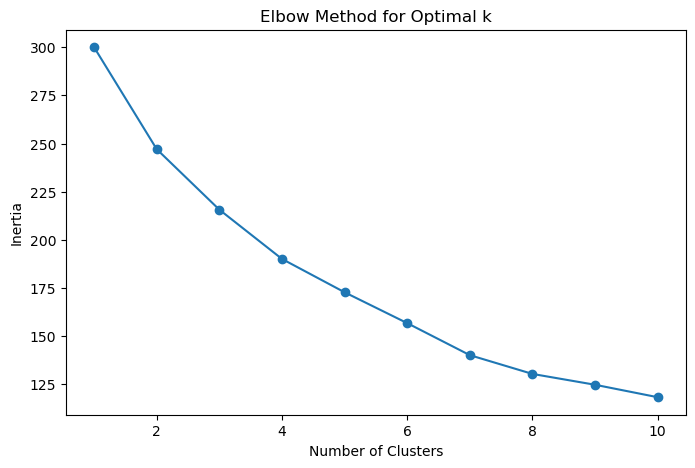

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


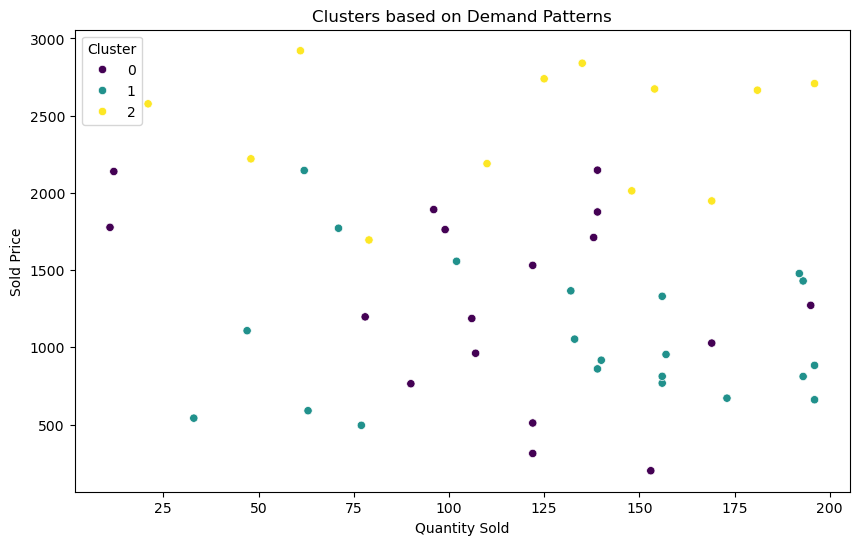

In [77]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset

label_encoder = LabelEncoder()
data['Product_Category'] = label_encoder.fit_transform(data['Product_Category'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Seasonality_Factor'] = label_encoder.fit_transform(data['Seasonality_Factor'])

# Selecting features for clustering
features = data[['Product_Category', 'Quantity_Sold', 'Sold_Price', 'Development_Cost', 'Seasonality_Factor', 'Region']]

# Scaling the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# From the elbow plot, choose an optimal number of clusters, e.g., k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Quantity_Sold'], y=data['Sold_Price'], hue=data['Cluster'], palette='viridis')
plt.xlabel("Quantity Sold")
plt.ylabel("Sold Price")
plt.title("Clusters based on Demand Patterns")
plt.legend(title="Cluster")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

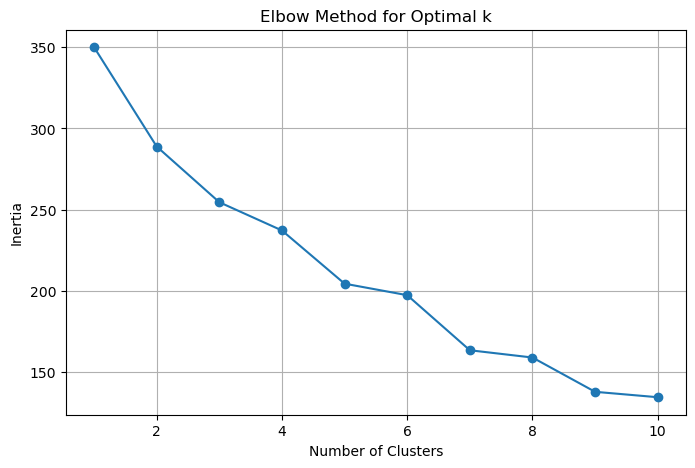

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


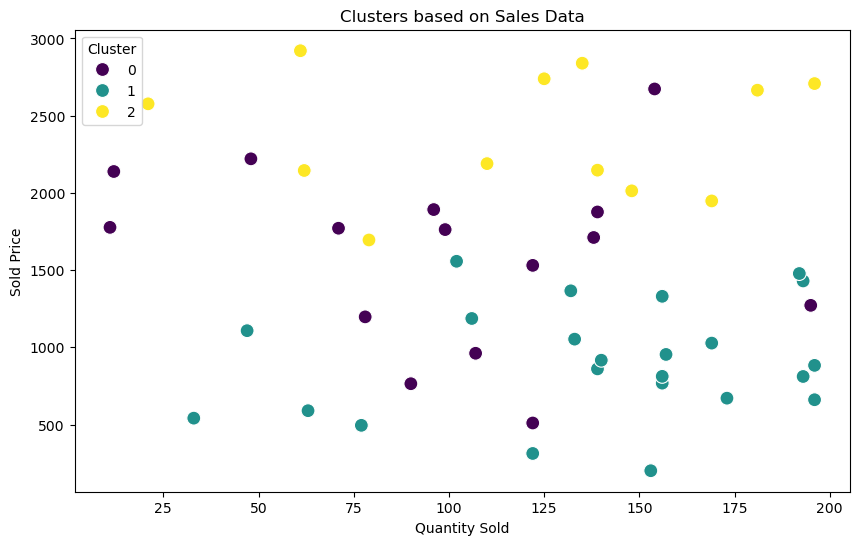

   Product_Category  Development_Cost  Sold_Price  Profit_Margin  \
0                 4            557.95     1771.48          68.50   
1                 2           1398.20     1272.20          -9.90   
2                 0           1258.99     2920.79          56.90   
3                 2           1683.07     2576.96          34.69   
4                 2            429.39     2220.84          80.67   

   Quantity_Sold  Cluster  
0             71        0  
1            195        0  
2             61        2  
3             21        2  
4             48        0  


In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Data Preprocessing
# Encoding categorical features
label_encoder = LabelEncoder()
data['Product_Category'] = label_encoder.fit_transform(data['Product_Category'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Seasonality_Factor'] = label_encoder.fit_transform(data['Seasonality_Factor'])

# Selecting features for clustering
features = data[['Product_Category', 'Development_Cost', 'Sold_Price', 'Profit_Margin', 'Quantity_Sold', 'Region', 'Seasonality_Factor']]

# Scaling the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Choosing the optimal number of clusters based on the elbow method (e.g., k=3)
optimal_k = 3  # Change this value based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Quantity_Sold'], y=data['Sold_Price'], hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel("Quantity Sold")
plt.ylabel("Sold Price")
plt.title("Clusters based on Sales Data")
plt.legend(title="Cluster")
plt.show()

# Display the first few rows of the clustered data
print(data[['Product_Category', 'Development_Cost', 'Sold_Price', 'Profit_Margin', 'Quantity_Sold', 'Cluster']].head())
